# <span style="color:#336699">CAP-351 - Neurocomputação
<hr style="border:1px solid #0077b9;">

Professor:
- Mascos G. Quiles

Discente:
- Camila P. Sales

## Atividade

- Realizar experimentos com pelo menos 3 datasets (usar o Iris para debug). Variar a vizinhança e taxa de aprendizagem

Apresentar, pelo menos, os seguintes mapas:

- U-Matrix

- Hit map e Heat maps

- Erro de quantização e topográfico


#### Datasets selecionados
 - Detecção de ocupação https://archive.ics.uci.edu/ml/datasets/Occupancy+Detection+#
 - Padrão de clientes de cartão de crédito https://archive.ics.uci.edu/ml/machine-learning-databases/00350/
 - Avila https://archive.ics.uci.edu/ml/datasets/Avila

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Dropout
from livelossplot.keras import PlotLossesCallback
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.optimizers import SGD

Using TensorFlow backend.


In [2]:
df = pd.read_csv( "./data/iris.data", sep="," , header = None);
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.columns = ['sepal length','sepal width','petal length','petal width', 'class']
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
s = {'Iris-setosa': 0,'Iris-versicolor': 1,'Iris-virginica': 2}
df['class'] = df['class'].map(s)

In [5]:
X = df.drop('class',axis=1)
y = df['class'].to_numpy()

# Dividir os dados em conjuntos de treinamento e teste.
X_train, X_test, y_train, y_test = train_test_split(X, y)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [6]:
plot_losses = PlotLossesCallback()

In [7]:
model = Sequential()

model.add(Dense(64, input_dim=4, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy','mean_squared_error'
])

Instructions for updating:
Colocations handled automatically by placer.


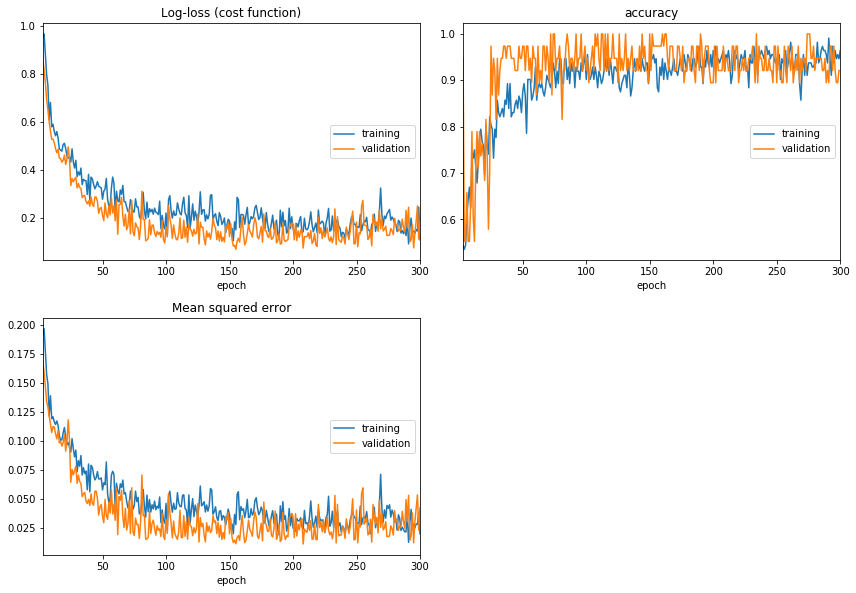

Log-loss (cost function):
training   (min:    0.090, max:    1.280, cur:    0.107)
validation (min:    0.068, max:    1.053, cur:    0.189)

accuracy:
training   (min:    0.420, max:    0.991, cur:    0.964)
validation (min:    0.553, max:    1.000, cur:    0.921)

Mean squared error:
training   (min:    0.012, max:    0.247, cur:    0.020)
validation (min:    0.011, max:    0.211, cur:    0.042)
38/38 [==============================] - 0s 26us/step


In [8]:
history = model.fit(X_train, y_train,
          epochs=300,
          validation_data=(X_test, y_test),
          callbacks=[plot_losses],
          verbose=0)
score = model.evaluate(X_test, y_test, batch_size=128)

In [9]:
def loss_plot(history):
    train_acc = history.history['val_loss']
    val_acc = history.history['val_accuracy']

    plt.figure(figsize = (9,5))
    plt.plot(np.arange(1,301), train_acc, marker = 'D', label = 'Loss')
    plt.plot(np.arange(1,301), val_acc, marker = 'o', label = 'Accuracy')

    plt.xlabel('epocas')
    plt.ylabel('acuracia')
    plt.plot('Train/Validation')
    plt.legend()
    plt.margins(0.02)
    plt.show()

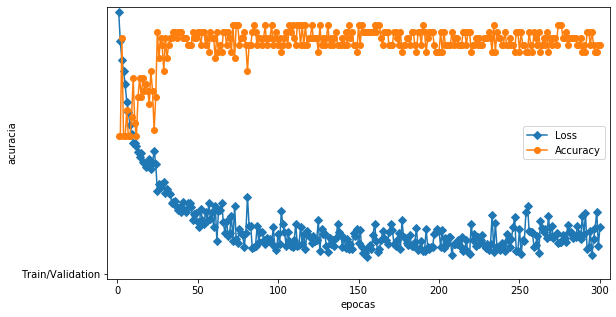

In [10]:
loss_plot(history)